In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('/root/python/Project/Datasets/kc_house_data.csv')

In [66]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [67]:
df=data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [68]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
#Function to change the format of year column
def year(str):
    if str[:4]=='2014':
        return '2014'
    else:
        return 2015
    
# Function to get is a property has been renovated
def renovated(year):
    if year == 0:
        return 0
    else:
        return 1
   
# Function to group grade column into 4 categories    
def grade(num):
    if num in range(1,4):
        return 'Very Bad'
    elif num in range(4,7):
        return 'Bad'
    elif num in range(7,10):
        return  'Mid'
    else:
        return 'Good'
  
# Function to change the view rating from 0-4 to 1-5    
def view(num):
    if num == 0:
        return 1
    elif num ==1:
        return 2
    elif num ==2:
        return 3
    elif num ==3:
        return 4
    else:
        return 5

In [70]:
#Applyting functions to columns
df['sale_year']=df['date'].apply(year)
df['sale_year']=df['sale_year'].astype('int')
df['renovated']=df['yr_renovated'].apply(renovated)
df['p_grade'] = df['grade'].apply(grade)
df['fil_view']=df['view'].apply(view)
df['prop_age']=df['sale_year']-df['yr_built']


In [71]:

df.drop(['id','date','sale_year','grade','yr_renovated', 'yr_built','lat','long','zipcode','view'],axis=1, inplace = True)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  sqft_living15  21613 non-null  int64  
 11  sqft_lot15     21613 non-null  int64  
 12  renovated      21613 non-null  int64  
 13  p_grade        21613 non-null  object 
 14  fil_view       21613 non-null  int64  
 15  prop_age       21613 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


In [74]:
#Setting the number of rows and columns that can be displayed in the output
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

<AxesSubplot: >

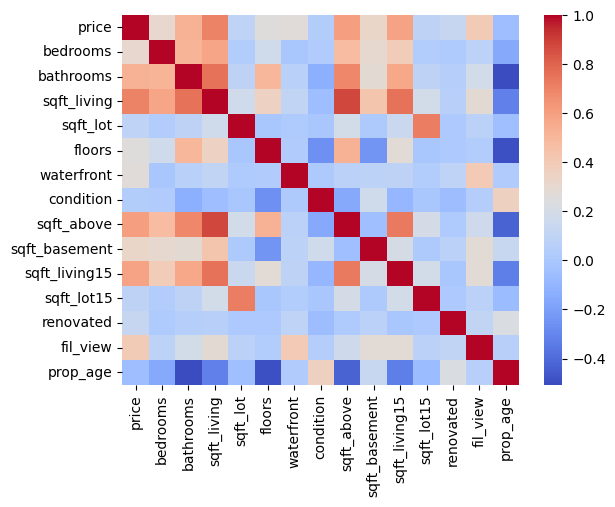

In [75]:
sns.heatmap(df.corr(),cmap='coolwarm')

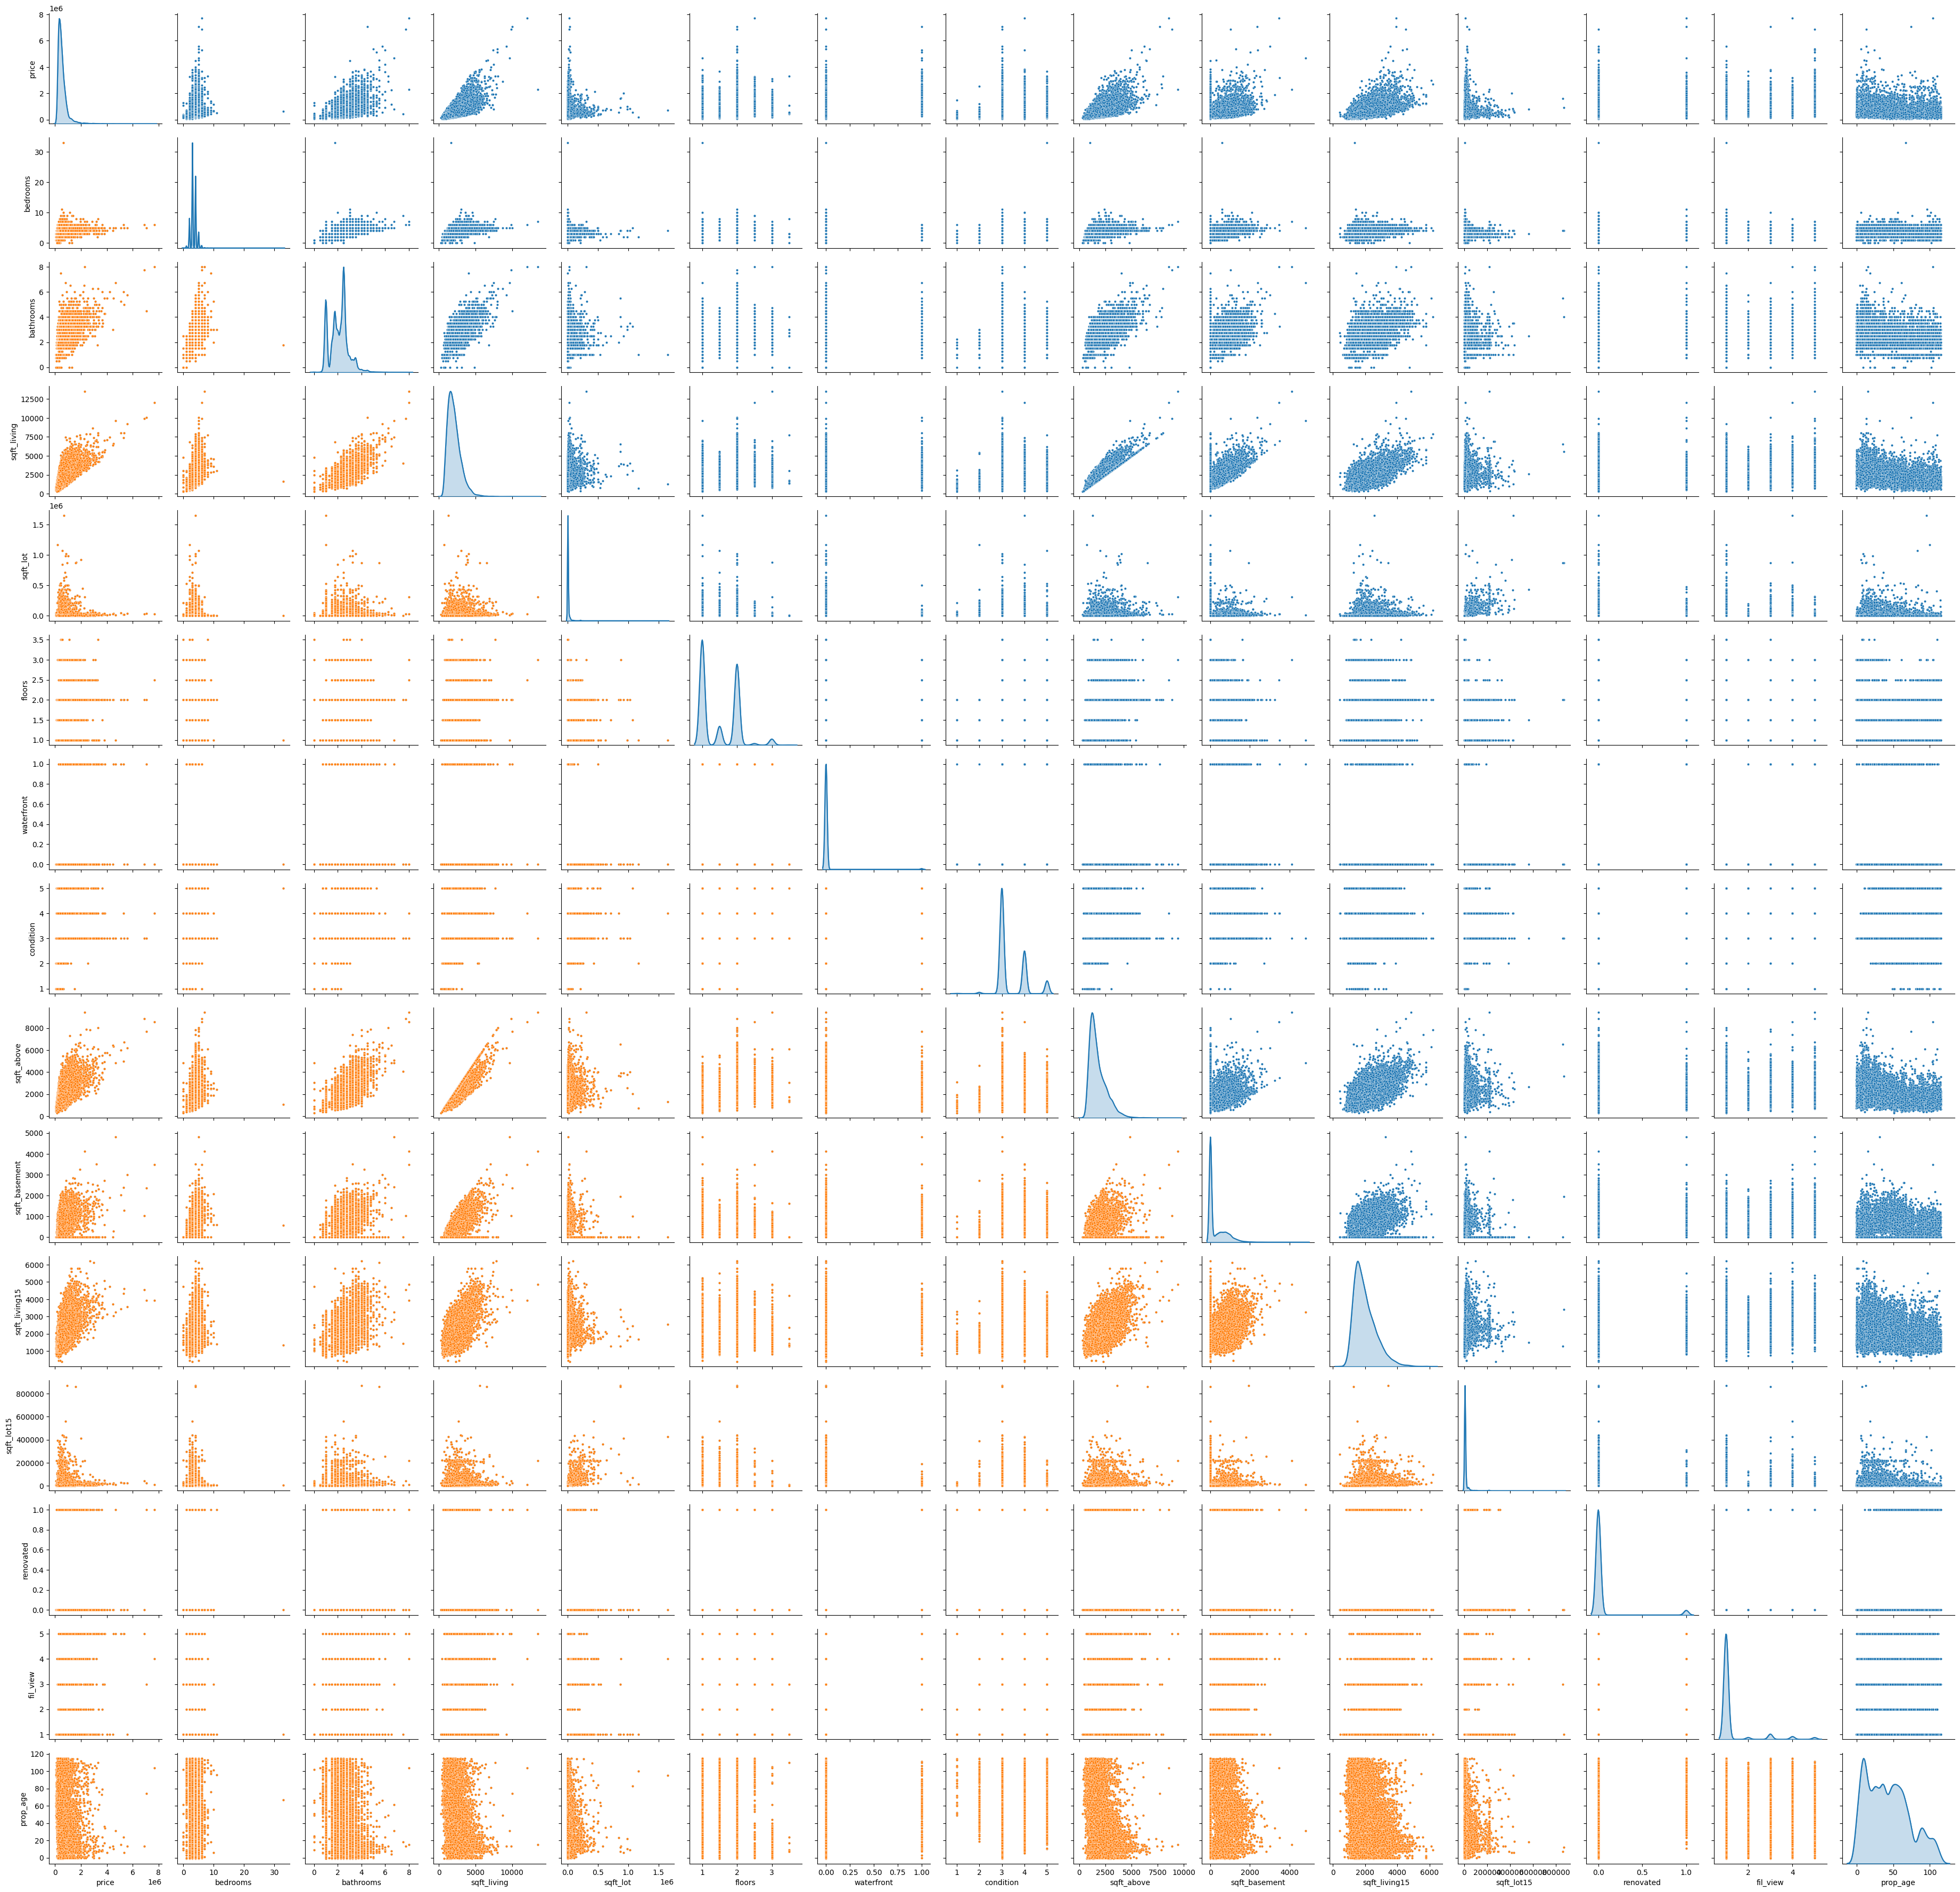

In [76]:
fig = sns.pairplot(data = df, diag_kind='kde', plot_kws={'s':10})
fig.map_lower(sns.scatterplot, s =10)
fig.map_diag(sns.kdeplot)
plt.subplots_adjust(top=0.95)

Model Creation

In [73]:
#Dummy creation for ordinal columns
dummy_df = pd.get_dummies(data = df, columns=['p_grade','renovated','waterfront','condition','fil_view'])
dummy_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,prop_age,p_grade_Bad,p_grade_Good,p_grade_Mid,p_grade_Very Bad,renovated_0,renovated_1,waterfront_0,waterfront_1,condition_1,condition_2,condition_3,condition_4,condition_5,fil_view_1,fil_view_2,fil_view_3,fil_view_4,fil_view_5
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1340,5650,59,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1690,7639,63,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0,2720,8062,82,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1360,5000,49,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1800,7503,28,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0


In [77]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   bedrooms          21613 non-null  int64  
 2   bathrooms         21613 non-null  float64
 3   sqft_living       21613 non-null  int64  
 4   sqft_lot          21613 non-null  int64  
 5   floors            21613 non-null  float64
 6   sqft_above        21613 non-null  int64  
 7   sqft_basement     21613 non-null  int64  
 8   sqft_living15     21613 non-null  int64  
 9   sqft_lot15        21613 non-null  int64  
 10  prop_age          21613 non-null  int64  
 11  p_grade_Bad       21613 non-null  uint8  
 12  p_grade_Good      21613 non-null  uint8  
 13  p_grade_Mid       21613 non-null  uint8  
 14  p_grade_Very Bad  21613 non-null  uint8  
 15  renovated_0       21613 non-null  uint8  
 16  renovated_1       21613 non-null  uint8 

In [78]:
dummy_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,prop_age,p_grade_Bad,p_grade_Good,p_grade_Mid,p_grade_Very Bad,renovated_0,renovated_1,waterfront_0,waterfront_1,condition_1,condition_2,condition_3,condition_4,condition_5,fil_view_1,fil_view_2,fil_view_3,fil_view_4,fil_view_5
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.585379,0.082447,-0.053951,-0.230678,0.559605,-0.198191,-0.012984,-0.126092,0.126092,-0.266369,0.266369,-0.020885,-0.051917,0.007131,-0.030715,0.057585,-0.359120,0.092607,0.148418,0.182880,0.307932
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.391638,0.029244,-0.154324,-0.271898,0.191710,0.087472,-0.038340,-0.018553,0.018553,0.006582,-0.006582,-0.036246,-0.051950,0.004871,-0.008931,0.028119,-0.080106,0.022200,0.045060,0.050431,0.034531
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.568634,0.087175,-0.506407,-0.399278,0.402302,0.044996,-0.034047,-0.050260,0.050260,-0.063744,0.063744,-0.045493,-0.077411,0.190546,-0.166147,-0.034292,-0.177145,0.038054,0.087204,0.112296,0.107931
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.756420,0.183286,-0.318488,-0.345253,0.558581,-0.105546,-0.023108,-0.055094,0.055094,-0.103818,0.103818,-0.035069,-0.065324,0.102413,-0.083794,-0.018136,-0.270907,0.066511,0.135285,0.158885,0.169460
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.144608,0.718557,-0.052990,-0.009597,0.117564,-0.072920,0.003392,-0.007745,0.007745,-0.021604,0.021604,0.006323,0.037617,-0.011452,0.013157,-0.014497,-0.067847,-0.008287,0.037278,0.073871,0.019172
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.279885,-0.011269,-0.489640,-0.249057,0.222001,0.047568,-0.012455,-0.006260,0.006260,-0.023698,0.023698,-0.023773,-0.055953,0.318049,-0.257795,-0.120545,-0.017871,-0.022721,0.009751,0.020267,0.025094
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.731870,0.194050,-0.424248,-0.308213,0.557238,-0.134316,-0.020840,-0.023178,0.023178,-0.072075,0.072075,-0.028998,-0.058925,0.194555,-0.142486,-0.088453,-0.153325,0.021839,0.077861,0.091663,0.107625
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,0.200355,0.017276,0.132865,-0.139787,0.116544,0.032283,-0.008962,-0.070963,0.070963,-0.080588,0.080588,-0.018520,-0.025309,-0.151498,0.092712,0.127865,-0.275310,0.097164,0.135064,0.158213,0.150292
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.731870,0.200355,1.000000,0.183192,-0.326552,-0.301006,0.513513,-0.110385,-0.014075,0.002755,-0.002755,-0.086463,0.086463,-0.010003,-0.052417,0.113784,-0.074377,-0.061405,-0.273444,0.076880,0.139827,0.162298,0.153081
sqft_lot15,0.082447,0.029244,0.087175,0.183286,0.718557,-0.011269,0.194050,0.017276,0.183192,1.000000,-0.070954,-0.013943,0.116751,-0.068987,0.006159,-0.007920,0.007920,-0.030703,0.030703,-0.003862,0.022240,-0.012694,0.020401,-0.017652,-0.064345,-0.009125,0.035823,0.063172,0.027339


In [79]:
X_features = dummy_df.drop(['price','sqft_lot15'], axis=1)
y_feature = dummy_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_feature, test_size=0.2, random_state=0)

print(f"No. of train datasets: x={X_train.shape} y={y_train.shape}")
print(f"No. of test datasets: x={X_test.shape} y={y_test.shape}\n")

No. of train datasets: x=(17290, 27) y=(17290,)
No. of test datasets: x=(4323, 27) y=(4323,)



In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

print(f"Model type: {model}\n")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Model type: LinearRegression()

Intercept: 225342.1050112252
Coefficient: [-3.96877614e+04  5.55545042e+04  1.26133725e+02 -2.88462490e-01
  6.11947766e+04  5.93693778e+01  6.67643470e+01  5.71608358e+01
  3.05089567e+03 -1.23904090e+05  2.33877884e+05 -5.76589838e+04
 -5.23148102e+04 -1.83555641e+04  1.83555641e+04 -2.37077665e+05
  2.37077665e+05 -7.15777256e+04 -1.89674233e+04  7.61880771e+03
  2.43856509e+04  5.85406903e+04 -1.23286543e+05 -1.07048441e+03
 -6.28474738e+04 -4.84840542e+03  1.92052907e+05]


In [81]:
print(f"Model Score Train: {model.score(X_train, y_train)}") 
print(f"Model Score Test: {model.score(X_test, y_test)}")

Model Score Train: 0.6411803118876803
Model Score Test: 0.6238927696108105


In [82]:
y_prediction = model.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error: ", mse)

Mean Squared Error:  44728277551.22065
